### Link to your presentation video here

# Your code here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

%matplotlib inline
tf.keras.backend.clear_session()

In [2]:
def clean_df(df):
    drop_cols = ['sofifa_id', 'short_name', 'nationality', 'club', 'team_position', 'weak_foot', 'player_positions', 'preferred_foot','skill_moves', 'player_url', 'long_name', 'dob', 'work_rate', 'joined', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_jersey_number', 'loaned_from', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'player_traits', 'ls', 'st', 'rs','lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm','rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb','rcb', 'rb']
    df_cleaned = df.drop(drop_cols, axis=1)
    
    x = df_cleaned.drop('overall', axis=1)
    y = df_cleaned['overall']
    cols = x.columns

    for col in cols:
        if(type(x[col][0]) == str):
            x[col] = [int(eval(i)) for i in x[col].values]
        else:
            x[col].fillna(np.mean(x[col]), inplace=True)
    
    return x, y 

In [3]:
def eval_model(x, y, model):
    d = 2
    x_poly = PolynomialFeatures(degree=d).fit_transform(x)
    y_pred = model.predict(x_poly)

    mse = mean_squared_error(y, y_pred)

    score = r2_score(y, y_pred)

    return mse, score

In [4]:
df_19 = pd.read_csv('data/players_19.csv')
x,y = clean_df(df_19)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
d = 2

x_poly_train = PolynomialFeatures(degree=d).fit_transform(x_train)
x_poly_test = PolynomialFeatures(degree=d).fit_transform(x_test)

<AxesSubplot:>

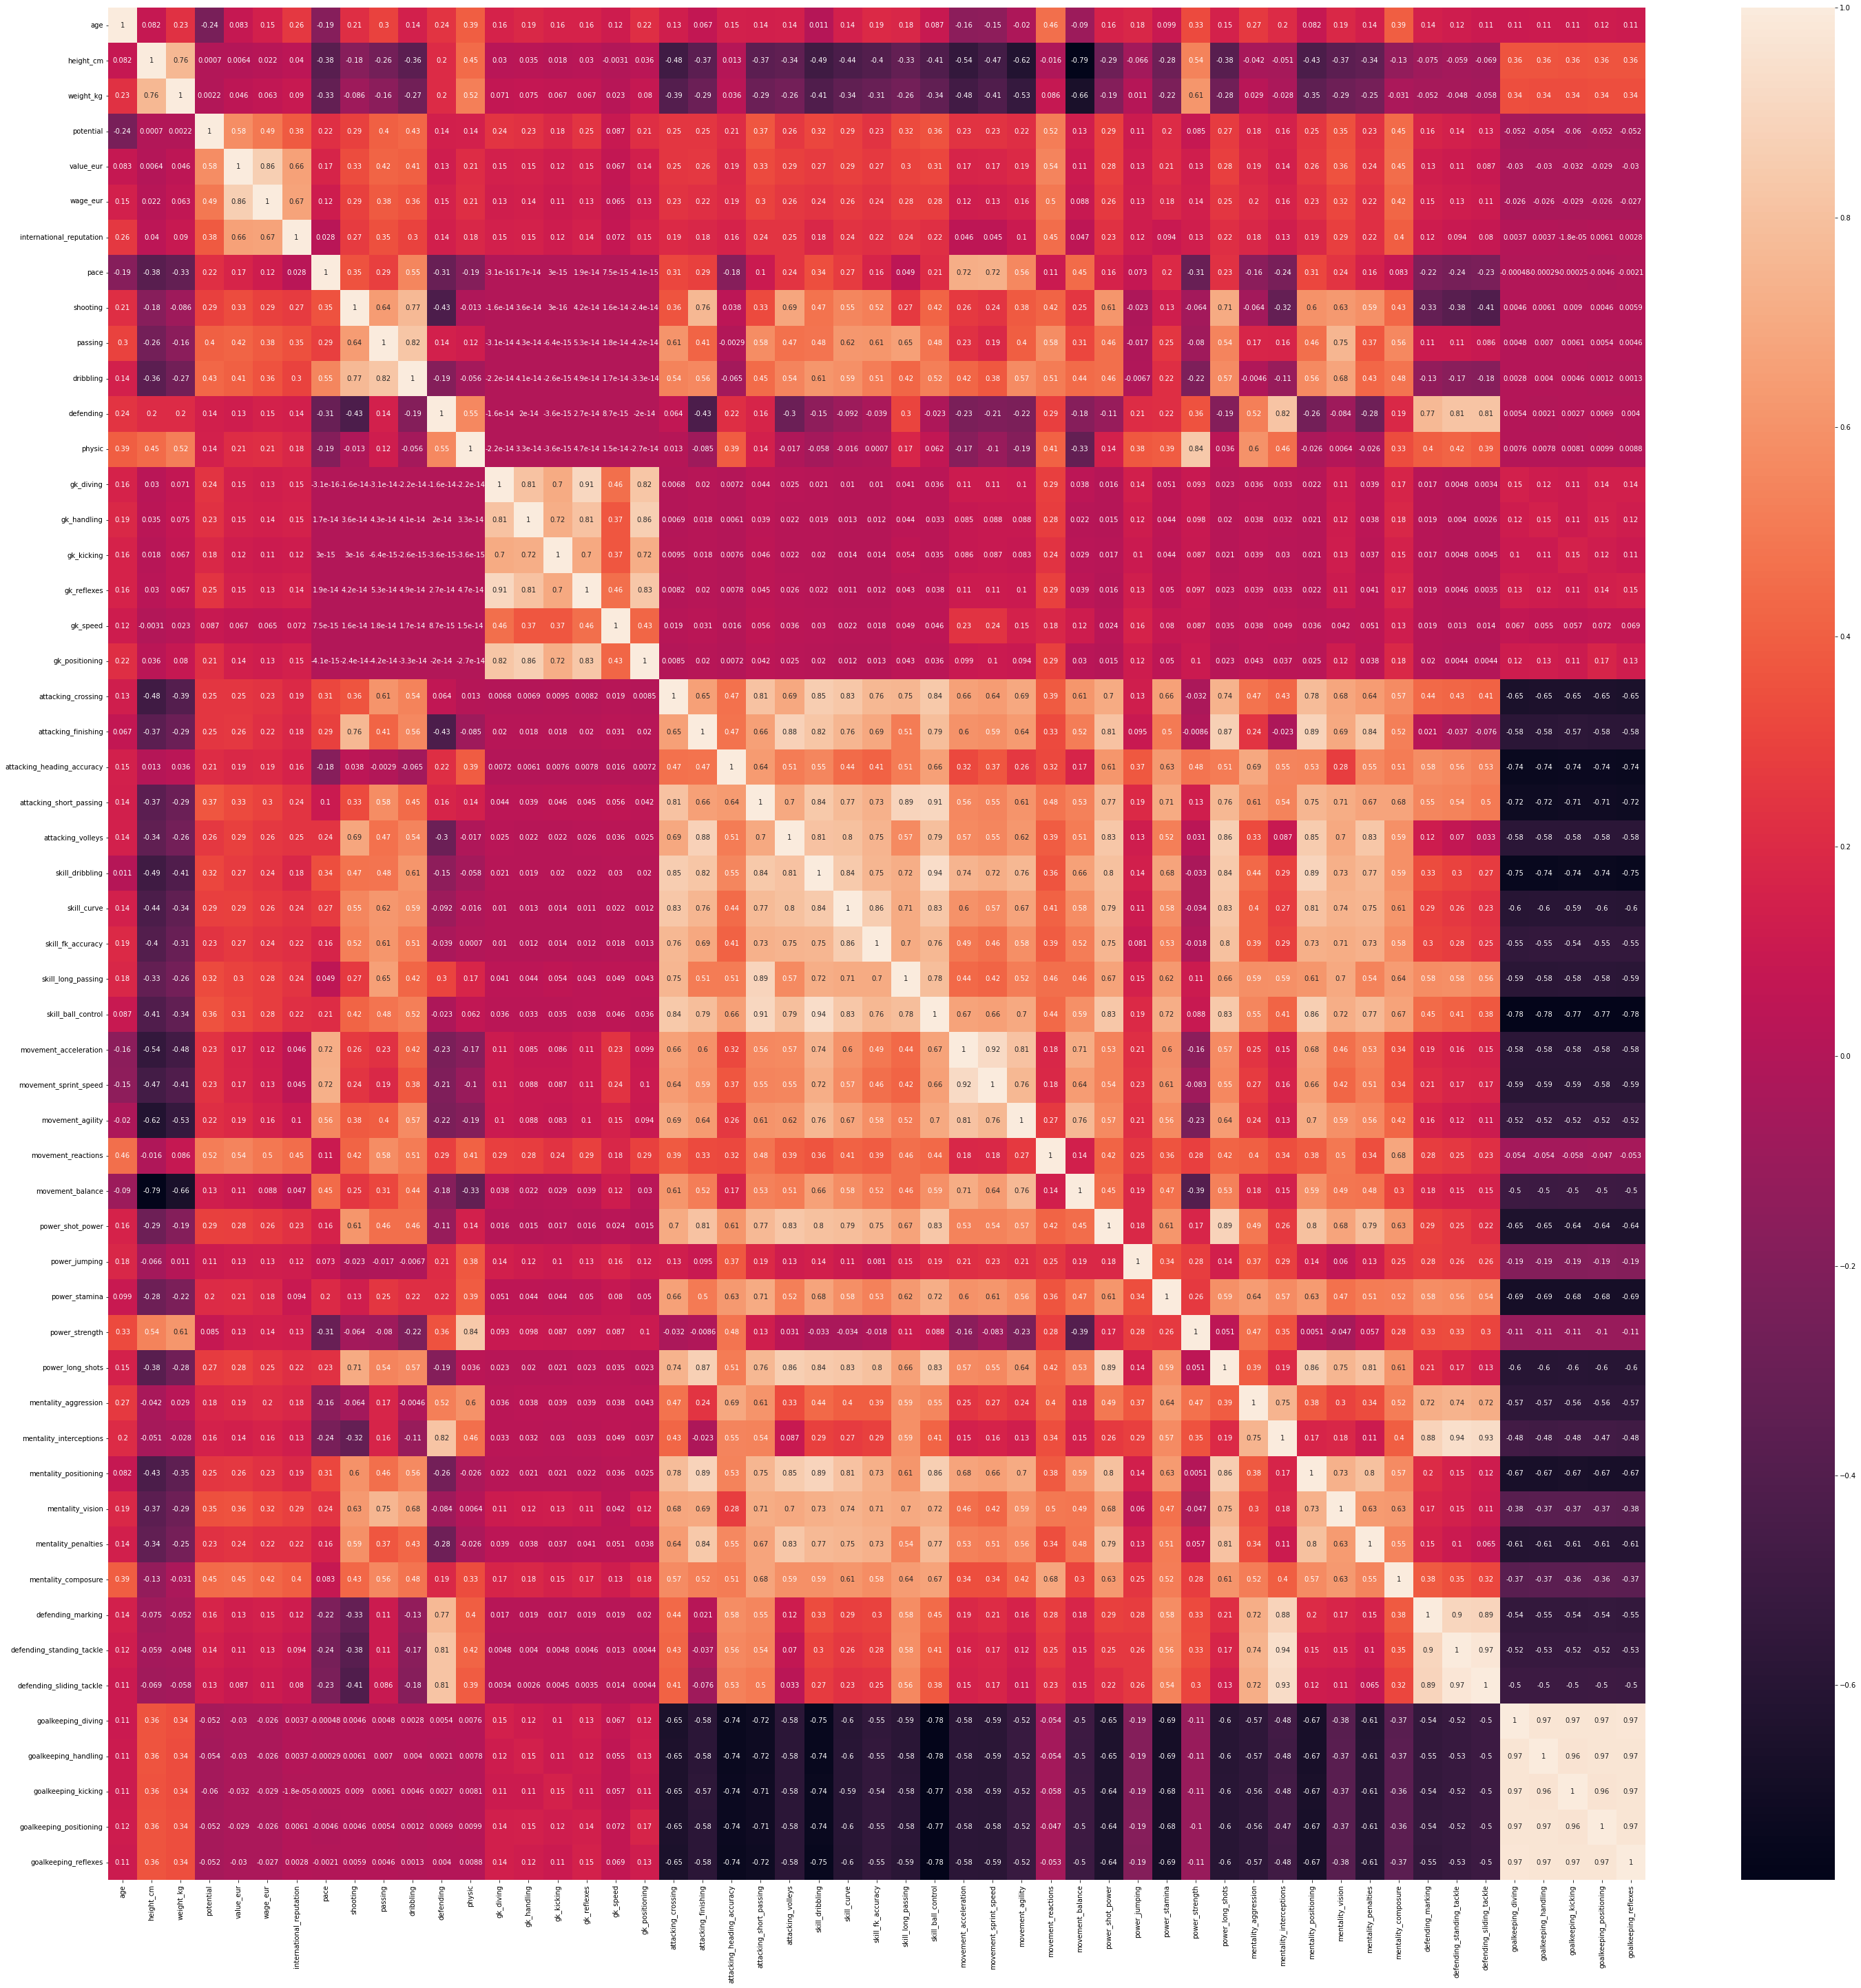

In [5]:
fig, ax = plt.subplots(figsize=(50,50)) 
sb.heatmap(x.corr(), annot=True, ax = ax)

In [6]:
#Train the model on FIFA 19 data
model = LinearRegression()
model.fit(x_poly_train, y_train)
y_pred = model.predict(x_poly_test)

mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(f'Validation mse: {mse}, r2 score: {score}')

Validation mse: 0.7715105546857964, r2 score: 0.9840496905724585


In [7]:
for year in range(17,21):
    df = pd.read_csv(f'data/players_{year}.csv')
    x,y = clean_df(df)
    mse, score = eval_model(x, y, model)
    
    print(f'***** FIFA {year} Evaluation *****')
    print(f'MSE: {mse:.3f},  R2 Score: {score*100:.3f}')
    print('\n')

***** FIFA 17 Evaluation *****
MSE: 2.756,  R2 Score: 94.600


***** FIFA 18 Evaluation *****
MSE: 1.034,  R2 Score: 97.877


***** FIFA 19 Evaluation *****
MSE: 0.660,  R2 Score: 98.650


***** FIFA 20 Evaluation *****
MSE: 0.986,  R2 Score: 97.959


